# Circuit Building
- This notebook contains some examples of using the circuit builder class as part of the emulator.

In [2]:
import lightworks as lw
from lightworks import emulator, State

import matplotlib.pyplot as plt
import numpy as np

## Basic circuit
- Start with a basic circuit, consisting only of beam splitters and phase shifters.

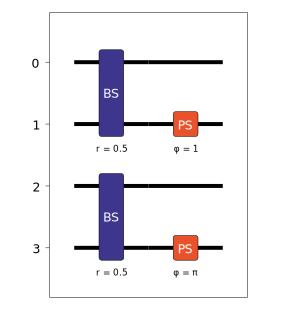

In [3]:
circuit = lw.Circuit(4)

# Beam splitters 
circuit.add_bs(0)
circuit.add_bs(2)

# Phase shifters
circuit.add_ps(1, 1)
circuit.add_ps(3, np.pi)

circuit.display()

## Mode swaps
- It is also possible to use the mode swap component to quickly switch modes.

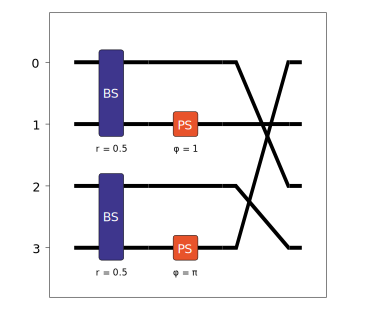

In [4]:
# Map mode 0 -> 2, 2 -> 3 & 3 -> 0

circuit.add_mode_swaps({0:2, 2:3, 3:0})

circuit.display()

## Loss
- When simulating, loss can be introduced to each of the circuit modes, either alongside components or directly.

In [5]:
# Add loss through beam splitter
circuit.add_bs(1, loss = 2)

# Add directly
circuit.add_loss(0, 0.3)

- The display_loss option is required for these to be shown.

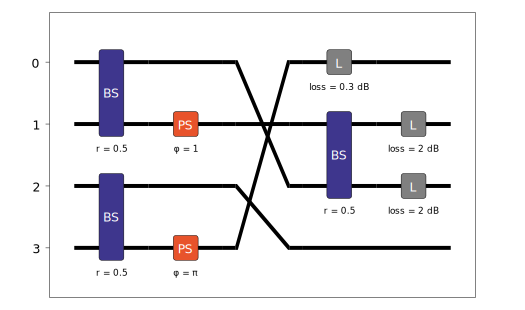

In [6]:
circuit.display(display_loss = True)

## Parameterization
- Circuits can be parameterized using the included Parameter objects.

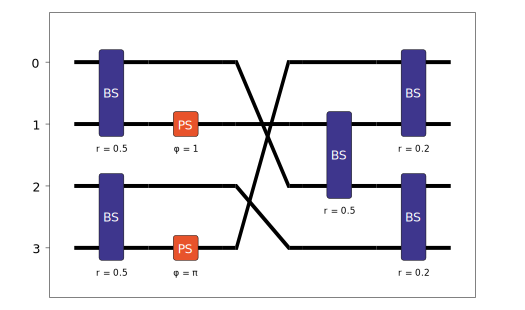

In [7]:
ref = lw.Parameter(0.2)

circuit.add_bs(0, reflectivity = ref)
circuit.add_bs(2, reflectivity = ref)

circuit.display()

- This can be updated with the set method to alter the circuit without having to redefine it.

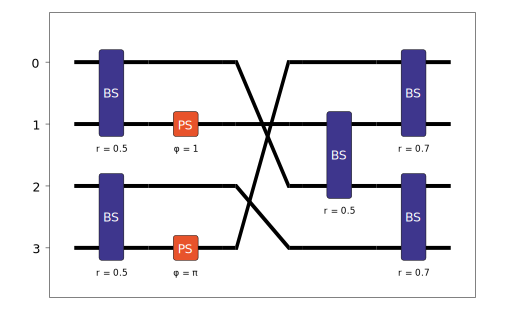

In [8]:
ref.set(0.7)

circuit.display()

## Adding circuits
- It is also possible to combine circuits using either + or add. The former requires both circuits be the same size, whereas the latter does not.

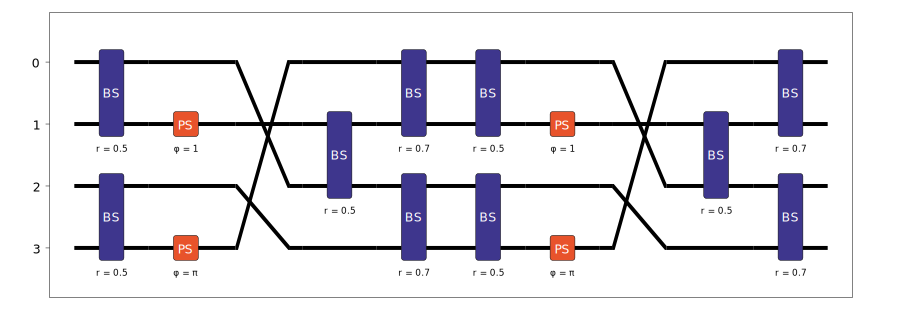

In [9]:
# Add the created circuit to itself
new_circuit =  circuit + circuit

new_circuit.display()

Sub-circuit:


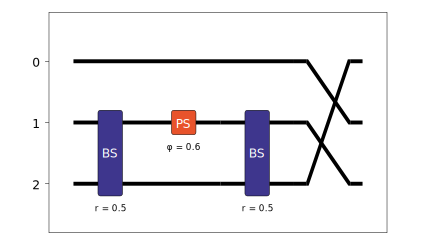

Combined circuit:


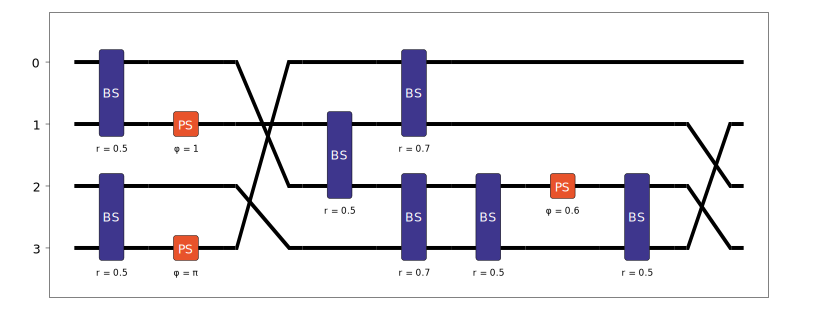

In [10]:
# Define a smaller circuit and add to mode 1 of the original circuit

circuit2 = lw.Circuit(3)
circuit2.add_bs(1)
circuit2.add_ps(1, 0.6)
circuit2.add_bs(1)
circuit2.add_mode_swaps({0:1, 1:2, 2:0})

print("Sub-circuit:")
circuit2.display()

circuit.add(circuit2, 1)

print("Combined circuit:")
circuit.display()